In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("/Users/Xugao/Desktop/technical assessment/test2&3_data/test3_data/test3_data.csv",index_col=0)

df.head()

,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601
2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945
3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106
4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647
5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148


In [3]:
df = df.groupby('Action', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 767546 to 659473
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               200000 non-null  object 
 1   ActionTime       200000 non-null  int64  
 2   Action           200000 non-null  object 
 3   Website          200000 non-null  object 
 4   BannerSize       200000 non-null  object 
 5   Brand            200000 non-null  object 
 6   colour           200000 non-null  object 
 7   InteractionTime  199998 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 13.7+ MB


In [5]:
df.describe()

,ActionTime,InteractionTime
count,2.000000e+05,199998.000000
mean,1.508375e+15,1.000422
std,4.363644e+12,1.001004
min,1.500991e+15,0.000003
25%,1.505167e+15,0.288501
50%,1.507721e+15,0.693244
75%,1.511530e+15,1.386948
max,1.517357e+15,11.758751


In [6]:
df.describe(include='O')

,ID,Action,Website,BannerSize,Brand,colour
count,200000,200000,200000,200000,200000,200000
unique,89944,2,16,15,10,7
top,AMsySZaSHnOuwfEjIHSMTU237tQS,View,Facebook,300x250,Carter's,Pink
freq,456,199951,120047,81736,44667,64325


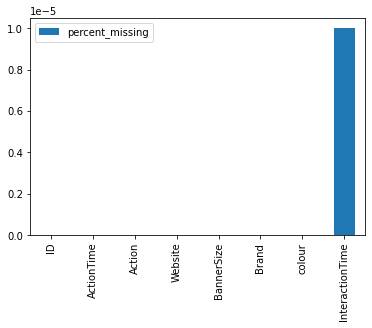

In [7]:
percent_missing = df.isnull().sum()/len(df)

missing_value_df = pd.DataFrame({'columns':df.columns.name,'percent_missing':percent_missing})
missing_value_df.plot(kind='bar')

In [8]:
col = ['Action','Website','BannerSize','colour']

for i in col:
    
     print(df[i].value_counts())
     print('-----------------------')

View     199951
Click        49
Name: Action, dtype: int64
-----------------------
Facebook         120047
Other             19425
Atedra            12348
instagram.com     11188
Craigslist.ca      7985
Yahoo              6821
TubeMogul          5739
Amazon             4204
Twitter            4150
Sympatico          2223
Kijiji             1590
Expedia            1357
Weather            1034
Youtube             972
Wayfair             810
AOL                 107
Name: Website, dtype: int64
-----------------------
300x250      81736
728x90       39222
Other        32356
320x50       12337
300x600      11915
160x600      11580
1200x627      6692
1x1           1752
320x480       1383
300x50         369
320x100        245
768x1024       204
750x125        130
1536x2048       63
other           16
Name: BannerSize, dtype: int64
-----------------------
Pink      64325
Yellow    36810
Gold      32437
Blue      27619
Red       18424
White     11072
other      9313
Name: colour, dtype: int64
--

In [9]:
df['Date'] = pd.to_datetime(df['ActionTime'], unit='us').reset_index()['ActionTime']
df['Weekday'] = df['Date'].apply(lambda x: x.weekday())
df['Hour'] = df['Date'].apply(lambda x: x.hour)
df['Month'] = df['Date'].apply(lambda x: x.month)

In [10]:
#import pytz
#from datetime import datetime, timedelta, timezone


#def convert_time(i):
    #epoch = datetime(1601, 1, 1)
    #cookie_microseconds_since_epoch = i
    #cookie_datetime = epoch + timedelta(microseconds=cookie_microseconds_since_epoch)
    #return str(cookie_datetime)

In [11]:
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"

In [12]:
df['day_period']=df['Hour'].apply(daypart)

In [13]:
df['Action'].value_counts(normalize=True)

View     0.999755
Click    0.000245
Name: Action, dtype: float64

In [14]:
cat_col =['Website','BannerSize','Brand','colour','Hour','Weekday','day_period','Month']

for i in cat_col:
    df[i] = df[i].astype('category')

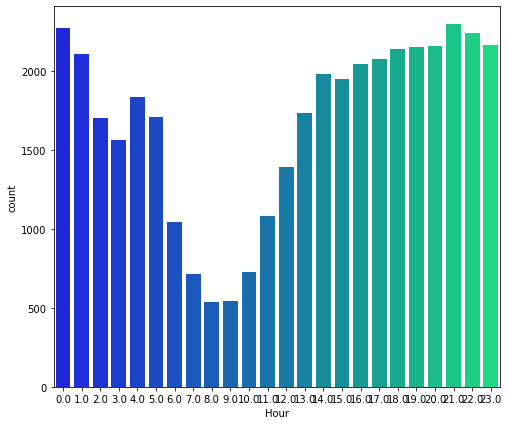

In [15]:
#EDA 
plt.figure(figsize=(8,7))
ax = sns.countplot(df['Hour'],palette='winter')

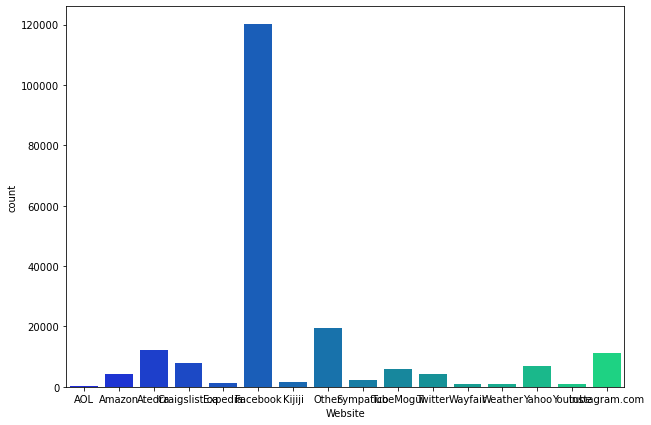

In [16]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Website'],palette='winter')

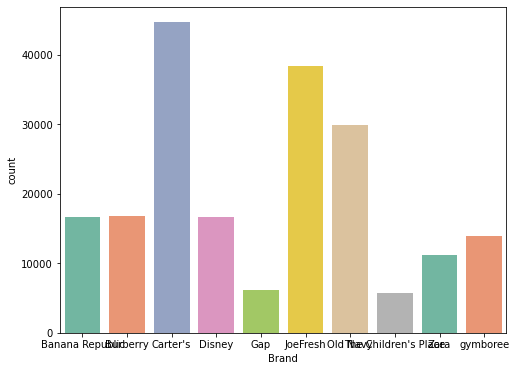

In [17]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df['Brand'],palette='Set2')

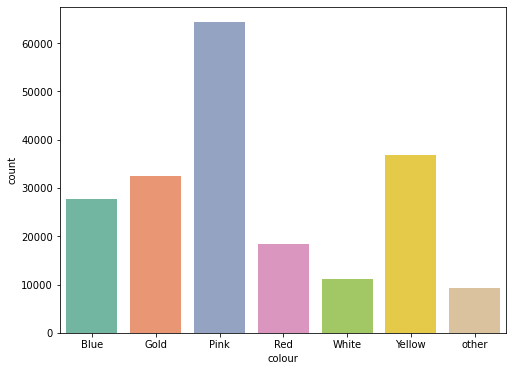

In [18]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df['colour'],palette='Set2')

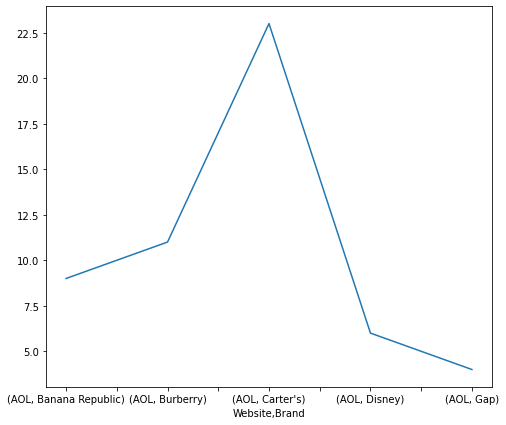

In [19]:
plt.figure(figsize=(8,7))
df.groupby(['Website','Brand'])['Action'].aggregate('count').head(5).plot(kind='line')

<Figure size 576x720 with 0 Axes>

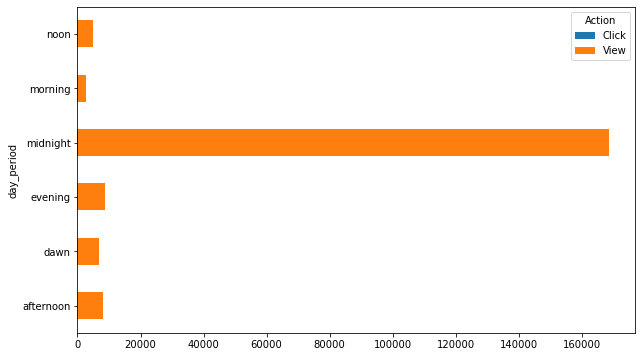

In [20]:
plt.figure(figsize=(8,10))

pd.crosstab(index=df['day_period'], columns=df['Action'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(10,6))

<Figure size 720x432 with 0 Axes>

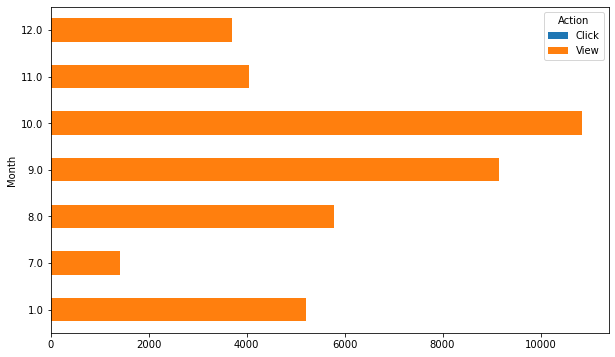

In [21]:
plt.figure(figsize=(10,6))

pd.crosstab(index=df['Month'], columns=df['Action'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(10,6))

<Figure size 720x720 with 0 Axes>

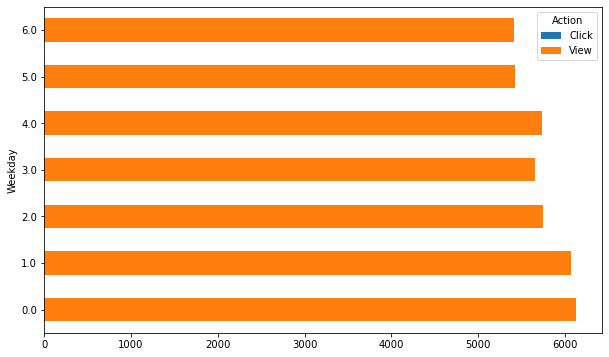

In [22]:
plt.figure(figsize=(10,10))

pd.crosstab(index=df['Weekday'], columns=df['Action'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(10,6))

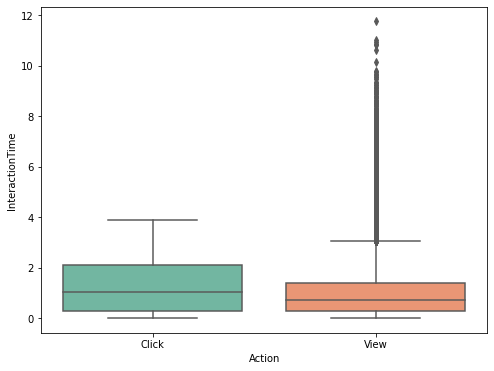

In [23]:
plt.figure(figsize=(8,6))

sns.set_palette(sns.color_palette("Set2",8))

sns.boxplot(x='Action', y='InteractionTime', data=df)

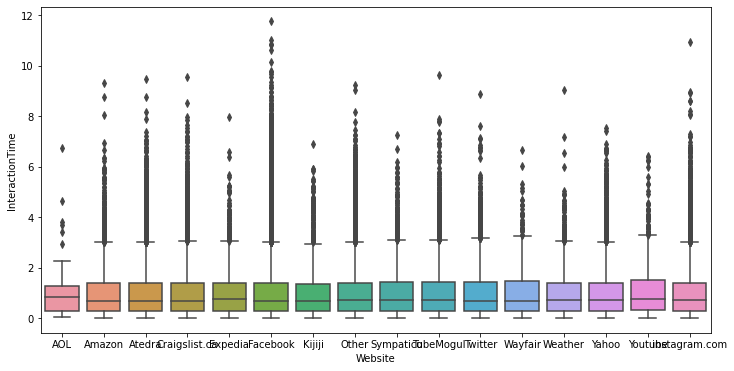

In [24]:
plt.figure(figsize=(12,6))

sns.set_palette(sns.color_palette("Set2",8))

sns.boxplot(x='Website', y='InteractionTime', data=df)

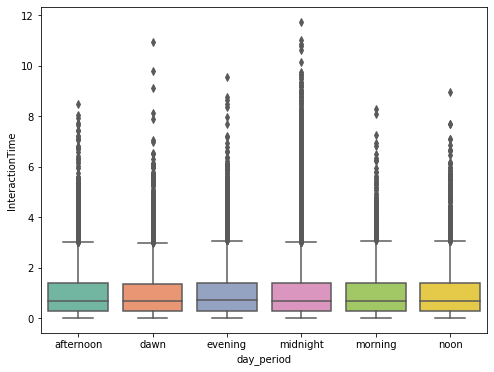

In [25]:
plt.figure(figsize=(8,6))

sns.set_palette(sns.color_palette("Set2",8))

sns.boxplot(x='day_period', y='InteractionTime', data=df)

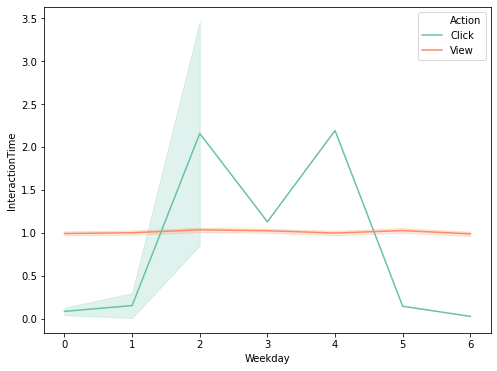

In [26]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x= "Weekday", y="InteractionTime", hue="Action")

## Feature Engineering & Data Preprocessing

In [27]:
df.drop(columns=['InteractionTime'],inplace=True)

In [28]:
df['Action'] = df['Action'].apply(lambda x: 1 if x=='Click' else 0)

df['Action'].value_counts()

0    199951
1        49
Name: Action, dtype: int64

In [29]:
y = df['Action']
X = df.drop(['Action','ID','ActionTime', 'Date'],axis=1)

In [30]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /opt/anaconda3/lib/python3.8/site-packages (2.5.1.post0)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import category_encoders as ce
#from sklearn.preprocessing import CategoricalEncoder
categorical_columns = ['Website','BannerSize','Brand','colour','Hour','Weekday','Month','day_period']
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=True)
df_train_encoded = encoder.fit_transform(X)

In [32]:
# X_all= df_train_encoded
# X_all.shape
df_train_encoded

,Website_Facebook,Website_instagram.com,Website_Wayfair,Website_Other,Website_TubeMogul,Website_Kijiji,Website_Amazon,Website_Yahoo,Website_Atedra,Website_Craigslist.ca,...,Month_8.0,Month_1.0,Month_11.0,Month_7.0,day_period_midnight,day_period_afternoon,day_period_dawn,day_period_evening,day_period_noon,day_period_morning
767546,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
752609,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
288371,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
830932,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
61854,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983371,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
791947,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
215392,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
920636,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
y

767546    1
752609    1
288371    1
830932    1
61854     1
         ..
983371    0
791947    0
215392    0
920636    0
659473    0
Name: Action, Length: 200000, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train_encoded,y,test_size=0.20, random_state=42)

In [35]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)
print('y_test shape:',y_train.shape)

X_train shape: (160000, 95)
X_test shape: (40000, 95)
y_test shape: (40000,)
y_test shape: (160000,)


In [36]:
X_train

,Website_Facebook,Website_instagram.com,Website_Wayfair,Website_Other,Website_TubeMogul,Website_Kijiji,Website_Amazon,Website_Yahoo,Website_Atedra,Website_Craigslist.ca,...,Month_8.0,Month_1.0,Month_11.0,Month_7.0,day_period_midnight,day_period_afternoon,day_period_dawn,day_period_evening,day_period_noon,day_period_morning
671614,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
997670,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
118103,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
506218,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
435968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953149,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
931938,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
804717,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
842562,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
X_test

,Website_Facebook,Website_instagram.com,Website_Wayfair,Website_Other,Website_TubeMogul,Website_Kijiji,Website_Amazon,Website_Yahoo,Website_Atedra,Website_Craigslist.ca,...,Month_8.0,Month_1.0,Month_11.0,Month_7.0,day_period_midnight,day_period_afternoon,day_period_dawn,day_period_evening,day_period_noon,day_period_morning
320189,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
481105,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
393570,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
124972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278788,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64333,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
712074,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
233364,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
72530,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy='most_frequent')

#X_train_imp = imp.fit_transform(X_train)
#X_test_imp = imp.transform(X_test)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [40]:
X_test_scaled

,Website_Facebook,Website_instagram.com,Website_Wayfair,Website_Other,Website_TubeMogul,Website_Kijiji,Website_Amazon,Website_Yahoo,Website_Atedra,Website_Craigslist.ca,...,Month_8.0,Month_1.0,Month_11.0,Month_7.0,day_period_midnight,day_period_afternoon,day_period_dawn,day_period_evening,day_period_noon,day_period_morning
0,-1.227236,-0.242696,-0.063521,-0.327597,5.855675,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
1,0.814839,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
2,0.814839,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
3,0.814839,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,-2.315672,-0.205218,-0.188427,-0.214439,6.307544,-0.119132
4,-1.227236,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,3.902202,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.814839,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,11.799486,-2.315672,-0.205218,5.307085,-0.214439,-0.158540,-0.119132
39996,-1.227236,-0.242696,-0.063521,-0.327597,5.855675,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
39997,-1.227236,-0.242696,-0.063521,3.052527,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,0.431840,-0.205218,-0.188427,-0.214439,-0.158540,-0.119132
39998,0.814839,-0.242696,-0.063521,-0.327597,-0.170775,-0.08895,-0.146593,-0.188445,-0.256266,-0.203875,...,-0.17253,-0.163746,-0.144714,-0.084749,-2.315672,-0.205218,5.307085,-0.214439,-0.158540,-0.119132


In [41]:
#from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTENC(random_state = 2, sampling_strategy = 'minority',categorical_features=categorical_columns)
#X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [42]:


def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite', 'Attrite'], yticklabels = ['Not Attrite', 'Attrite'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

## Train Model & Using GridSearch for Tuning

In [43]:
ros = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled,y_train)

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_scaled,y_train)
y_pred = DecisionTree.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39991
           1       0.00      0.00      0.00         9

    accuracy                           1.00     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       1.00      1.00      1.00     40000



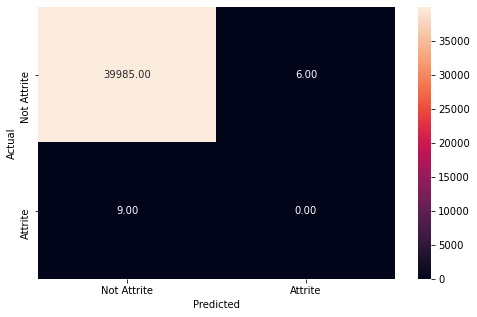

In [44]:
metrics_score(y_test,y_pred)

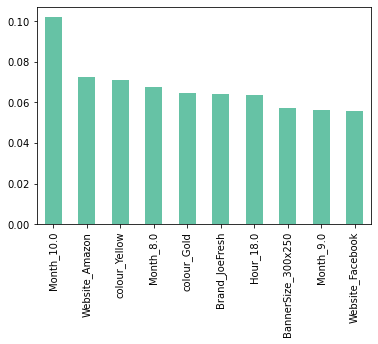

In [45]:
pd.Series(DecisionTree.feature_importances_,index=df_train_encoded.columns).sort_values(ascending=False).head(10).plot(kind='bar')

In [46]:
# GridSearch for decisiontree

dt_estimator = DecisionTreeClassifier(class_weight={0:0.17, 1:0.83},random_state=42)


# grid of parameters

parameters = {'max_depth': np.arange(2,7),
             'criterion':['gini','entropy'],
             'min_samples_leaf': [5,10,20,25]}


# type of scoring used to compare parameter combinations

#scorer = metrics.make_scorer(recall_score, pos_label = 1)

gridCV = GridSearchCV(dt_estimator, parameters, scoring="f1", cv=5)

gridCV = gridCV.fit(X_train_scaled, y_train)

dt_estimator = gridCV.best_estimator_

dt_estimator.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=42)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39991
           1       0.00      0.00      0.00         9

    accuracy                           1.00     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       1.00      1.00      1.00     40000



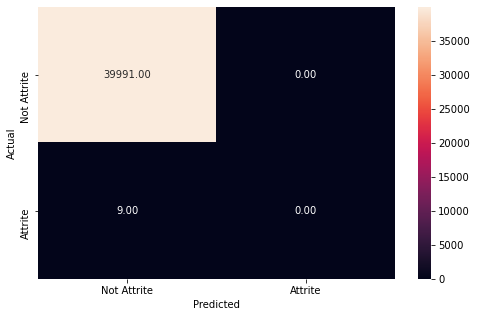

In [47]:
# Checking performance on the test dataset
y_test_pred_dt = dt_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [48]:
lr=LogisticRegression(random_state=42)


lr.fit(X_train_scaled, y_train)


print('LogisticRegression',lr.score(X_test_scaled,y_test))
# f1 score

LogisticRegression 0.999775


In [49]:
y_pred_train = lr.predict(X_train_scaled) 

In [50]:
cols = X.columns

coef_lr = lr.coef_

pd.DataFrame(coef_lr,columns=X_train_scaled.columns).T.sort_values(by = 0, ascending = False)

,0
Website_Facebook,0.601795
BannerSize_1x1,0.313716
BannerSize_160x600,0.277971
Hour_22.0,0.270372
Hour_17.0,0.269888
...,...
Month_1.0,-0.419467
Brand_The Children's Place,-0.429189
Website_Craigslist.ca,-0.446338
Website_Atedra,-0.458569


In [51]:
parameters = {'C':[0.001,0.01,0.1,1,10],
              'penalty':['l1','l2'],
              'max_iter':list(range(10,80,10)),
              'solver':['liblinear']}

#scorer = metrics.make_scorer(recall_score, pos_lable=1)

In [ ]:
grid_obj = GridSearchCV(estimator=lr, param_grid=parameters, scoring = "f1", cv=3,verbose=-10)

grid_obj = grid_obj.fit(X_train_scaled,y_train)

lr_tuned = grid_obj.best_estimator_

lr_tuned.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

y_pred=knn.fit(X_train_scaled, y_train)

# Predicted class
metrics_score(y_test, y_pred)

In [ ]:
#Using GridSearchCV for Hyperparameter tuning KNN

params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 5)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

In [ ]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train_scaled, y_train)

In [ ]:
y_pred_test_knn_estimator = knn_estimator.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_knn_estimator)

## Model Interpretation

In [56]:
# model explainations
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier((50, 50), random_state=1)

nn.fit(X_train_scaled, y_train)

y_proba = nn.predict_proba(X_test)[:, 1]
y_proba

array([2.68457428e-08, 6.98856288e-09, 1.45631406e-07, ...,
       2.80051618e-08, 4.85934977e-04, 6.77362201e-08])

In [ ]:
pip install lime

In [57]:
#!pip install lime
from lime.lime_tabular import LimeTabularExplainer

from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train_scaled.values,feature_names=X_train_scaled.columns.values,
                                 class_names=['view', 'click'])

# Get the explanation from the black box model
exp = explainer.explain_instance(X_test_scaled.loc[100], nn.predict_proba)

# Display the explanation
exp.show_in_notebook()